# A2b: Photon Detection  
Finn Hittson - fxh157  
CSDS 464  
Due: 02/16/2023  

## 1. Simulating a dim flash of light

### 1a. Random times

In [8]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math

def randtimes(N:int=100, t1:float=1.0, t2:float=2.0):
    return np.array([random.uniform(t1, t2) for _ in range(N)])

def plotflash(y):
    for p in y:
        plt.plot([p, p], [0,1], 'b')
        plt.scatter(p, 1, c='b', s=20, zorder=10)
    plt.xlabel("Time $t$", fontsize=16)
    plt.title("Stem plot of random flashes", fontsize=18)
    plt.xlim([0,3])
    plt.ylim([0,1.5])
    plt.yticks([])
    plt.xticks([0,1,2,3])
    plt.show()

Example 1: Generate two different plots using   
```
t=randtimes(10; t1=1, t2=2)
plotflash(t; t1=1, t2=2)
```

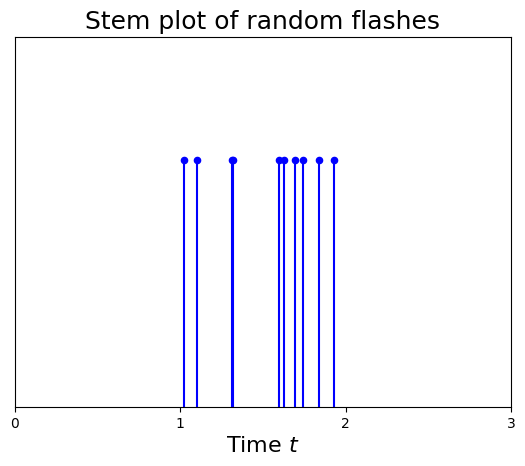

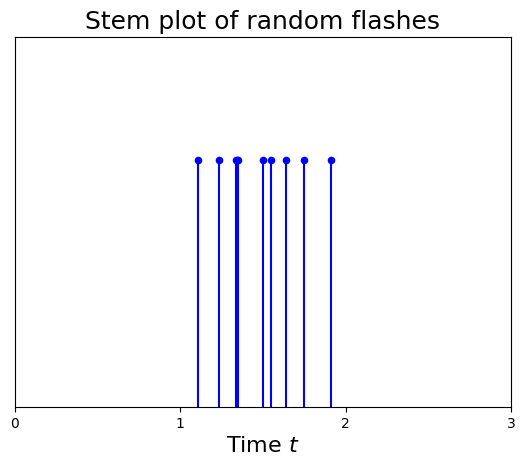

In [9]:
plotflash(y=a2b.randtimes(N=10, t1=1, t2=2))
plotflash(y=a2b.randtimes(N=10, t1=1, t2=2))

### 1b. Random intevals

In [10]:
def plotexppdf(stop:float=1.0, step:float=0.01, l:float=1.0):
    x = np.arange(0, stop, step)
    y = [l*math.exp(-l*i) for i in x]
    plt.plot(x,y,label=f"$\lambda={l}$")
    plt.legend()
    plt.xlabel("Time $t$, (sec)", fontsize=16)
    plt.ylabel("Probability $P(t)$", fontsize=16)
    plt.title("Exponential PDF", fontsize=18)
    plt.xlim([0,stop])
    plt.show()

def randintervals(N:int=100, l:float=1.0, t1:float=1.0):
    return [t1 + np.random.exponential(1/l) for _ in range(N)]

Example 2: Plot the exponential distribution with $\lambda=10$.

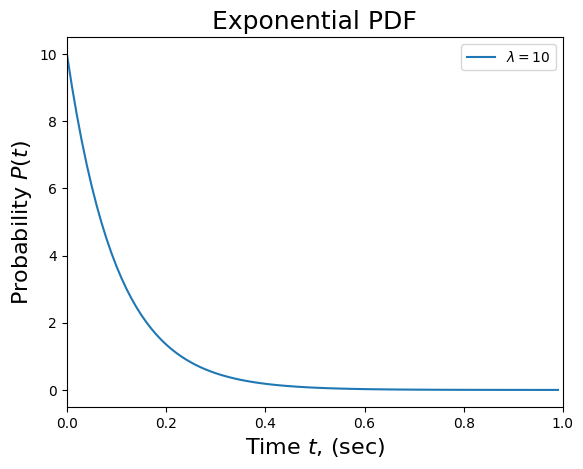

In [11]:
plotexppdf(l=10)

Example 3: Generate two different plots using   
```
t = randintervals(10; λ=10, t1=1)
plotflash(t; t1=1, t2=2)
```

a2b.plotflash(y=a2b.randintervals(N=10, l=1, t1=1))
a2b.plotflash(y=a2b.randintervals(N=10, l=1, t1=1))

### 1c. Seeing the flash
The first method uses the uniform distribution to generate random times that photons occur at. Therefore these photons are evenly distributed between one and zero. The second method uses the exponential distribution to generate random times that photons occur at. These photons will be more clustered at the passed $t_1$ with fewer photons at higher times. Detecting a photon is probabilistic because it is random whether a photon is absorbed by a rhodopsin molecule. Photons are naturally smaller than rhodopsin molecules so from where they are emitted from and their path towards a rhodopsin molecule is dictated by the chaotic random environment around it. Thus a photon being absorbed by a rhodopsin molecule is chance. 

## 2. Calculating the probability detection

### 2a. The probability of K photons

In [12]:
def poissonpdf(n:int=6, l:float=1.0, T:float=0.1):
    return pow(l*T, n) / math.factorial(n) * math.exp(-l*T)

def barplot(n:int=10, l:float=1.0, T:float=100.0):
    x = list(range(0, n+1))
    y = [poissonpdf(n=i, l=l, T=T) for i in x]
    plt.bar(x,y)
    plt.xlabel("Photon Count $n$", fontsize=16)
    plt.ylabel("$P[x=n]$", fontsize=16)
    plt.title(f"Poisson Distribution, $\lambda={l}$, $T={T}$", fontsize=18)
    plt.xticks(x)
    plt.show()

Example 4: What is the probability of receiving $3$ photons in a time period of $0.1$ secs with a rate of $10$ photons / sec?

In [13]:
poissonpdf(n=3, l=10, T=0.1)

0.061313240195240384

Example 5: Plot the Poisson distribution for a rate of 20 photons / sec and a time period of 0.1 secs.

a2b.barplot(n=10, l=20, T=0.1)

### 2b. The probability of K or more photons

In [15]:
def detectionprob(K, l:float=40.0, T:float=0.1):
    p = 0
    run = True
    while run:
        p += poissonpdf(n=K, l=l, T=T)
        if poissonpdf(n=K, l=l, T=T) < pow(10,-10):
            run = False
        K += 1
    return p

def probbarplot(K, l:float=40.0, T:float=0.1):
    x = list(range(1,K+1))
    y = [detectionprob(K=i, l=l, T=T) for i in x]
    plt.bar(x,y)
    plt.xlabel("Number of Photons $K$", fontsize=16)
    plt.ylabel("$p(n\\geq K\\ |\\ \\lambda,T)$", fontsize=16)
    plt.xticks(x)
    plt.title(f"Detection Probability, $\\lambda={l}$, $T={T}$", fontsize=18)
    plt.show()

Example 6: Compute the following: 
```
detectionprob(6; λ=40, T=0.1)
```

In [16]:
detectionprob(K=6, l=40, T=0.1)

0.21486961295971638

Example 7: Plot the detection probability as a function of the detection threshold for a rate of $40$ photons / sec and a time period of $0.1$ secs.

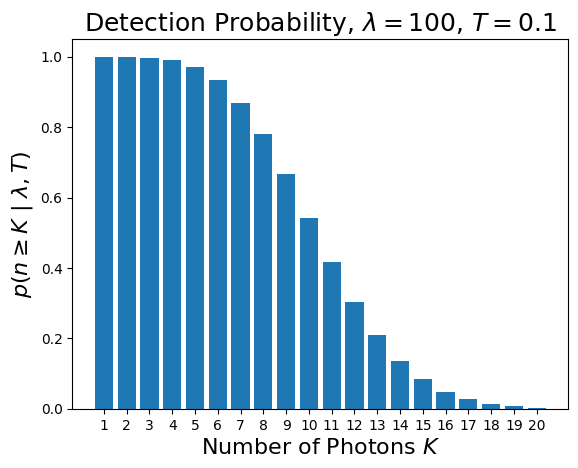

In [18]:
probbarplot(K=20, l=100, T=0.1)

## 3. Estimating the threshold from experimental data

### 3a. Simulating the photon stream

In [19]:
def lightflash(l, t1:float=0.8, t2:float=2.2):
    flash = [random.uniform(t1, t2) for _ in range(l)]
    return flash

def plotphotonstream(l:float=None, a:float=None, f1:float=None, f2:float=None, s1:float=None, s2:float=None):
    stream = []
    subset =[]
    if l is not None and f1 is not None and f2 is not None:
        stream = lightflash(l=l, t1=f1, t2=f2)
        x = list(range(1, len(stream)+1))
        plt.subplot(3,1,1)
        for p in stream:
            plt.plot([p,p], [0,1], 'b')
            plt.scatter(p, 1, c='b', s=20)
        plt.ylim([0,1.5])
        plt.yticks([])
        plt.xlim([f1, f2])
        plt.xticks(np.arange(f1,f2+0.2/2,0.2))
        plt.title('Photon stream (100 photons/ms)')
    if s1 is not None and s1 is not None:
        subset = []
        x = []
        plt.subplot(3,1,2)
        for p in stream:
            if s1 <= p and p <= s2:
                plt.plot([p,p], [0,1], 'b')
                plt.scatter(p, 1, c='b', s=20)
        plt.ylim([0,1.5])
        plt.yticks([])
        plt.xlim([f1, f2])
        plt.xticks(np.arange(f1,f2+0.2/2,0.2))
        plt.title(f"Photons through shutter $[{f1},{f2}]$")
    if a is not None:
        plt.subplot(3,1,3)
        count = 0
        for idx, p in enumerate(stream):
            if random.uniform(0,1) < a and s1 <= p and p <= s2:
                count += 1
                plt.plot([p,p], [0,1], 'b')
                plt.scatter(p, 1, c='b', s=20)
        plt.ylim([0,1.5])
        plt.yticks([])
        plt.xlim([f1, f2])
        plt.xticks(np.arange(f1,f2+0.2/2,0.2))
        plt.title(f"Photons detected by rods, $\\alpha={a}$, $N={count}$")
    plt.subplots_adjust(hspace=0.7)
    plt.show()

Example 8: Generate two plots from question 3a using the following parameters:
```
plotphotonstream(λ=100, α=0.06, f1=0.8, f2=2.2, s1=1, s2=2)
```
The first example should be where the flash is detected using a threshold of $K=6$; the second should be an example where it is not.

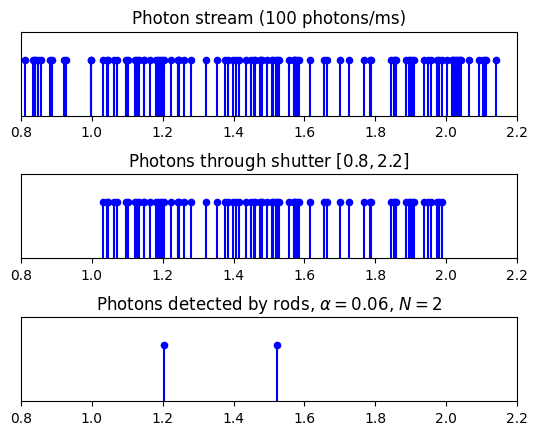

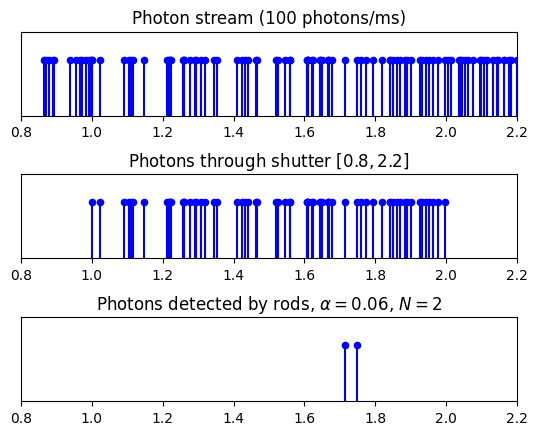

In [20]:
plotphotonstream(l=100, a=0.06, f1=0.8, f2=2.2, s1=1, s2=2)
plotphotonstream(l=100, a=0.06, f1=0.8, f2=2.2, s1=1, s2=2)

### 3b. Probability of seeing

In [22]:
def probseeing(I, a:float=0.06, K:int=6):
    p = 0
    run = True
    iterations = 0
    while run:
        p += poissonpdf(n=K, l=a, T=I)
        if poissonpdf(n=K, l=a, T=I) < pow(10,-21):# or iterations >= 100:
            run = False
        iterations += 1
        K += 1
    return p

Example 9: Compute the probability of seeing a photon given the following parameters:
```
probseeing(I=10, α=0.06, K=6)
```

In [23]:
probseeing(I=10, a=0.06, K=6)

3.885607815132648e-05

### 3c. Plotting % detected vs light intensity for different parameters

In [25]:
def plotdetectioncurve(a:list=None, K:list=None, x:list=None, y:list=None, start:float=0.01, stop:int=175):
    if a is None or K is None:
        return
    I = np.arange(start, stop, 0.01)
    for idx in range(len(a)):
        probs = [probseeing(I=i, a=a[idx], K=K[idx]) for i in I]
        plt.plot(I, probs, label=f"$\\alpha={a[idx]}$, $K={K[idx]}$")
    if x is not None and y is not None:
        plt.scatter(x, y, c='r', s=30, zorder=10)    
    plt.xlabel("Light Intensity $I$", fontsize = 16)
    plt.ylabel("Probability of seeing", fontsize = 16)
    plt.title("Probability of seeing Light Intensities", fontsize = 18)
    plt.xlim([start, stop])
    plt.xscale("log")
    plt.ylim([0,1])
    plt.legend(loc="upper left")
    plt.show()

Example 10: Plots the percentage of light flashes detected as a function of the intensity $I$.

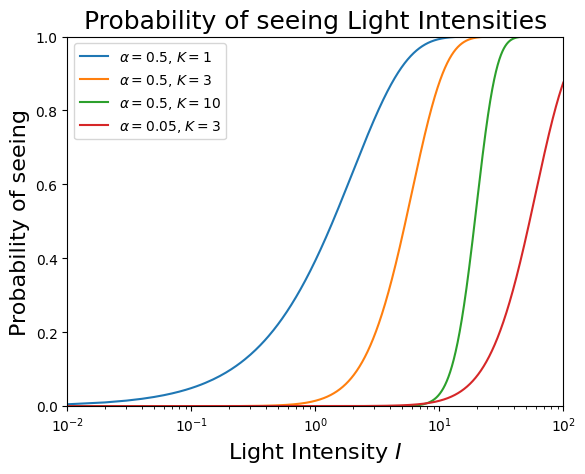

In [26]:
plotdetectioncurve(a=[0.5, 0.5, 0.5, 0.05], K=[1, 3, 10, 3], stop=100)

### 3d. Fitting parameters to experimental data

In [27]:
def plotfit(a:float=None, K:int=None, start:float=1, stop:int=300):
    if a is None or K is None:
        return
    aset = [0.02, 0.13, a]
    Kset = [2, 12, K]
    x = [24.1, 37.6, 58.6, 91.0, 141.9, 221.3]
    y = np.array([0.0, 4.0, 18.0, 54.0, 94.0, 100.0]) / 100
    plotdetectioncurve(a=aset, K=Kset, x=x, y=y, start=start, stop=stop)

Example 11: Plot the best fit to the following data and two suboptimal examples:
```
24.1, 37.6, 58.6, 91.0, 141.9, 221.3    # SS: average photons at cornea
 0.0,  4.0, 18.0, 54.0,  94.0, 100.0    # SS: percent seen
```

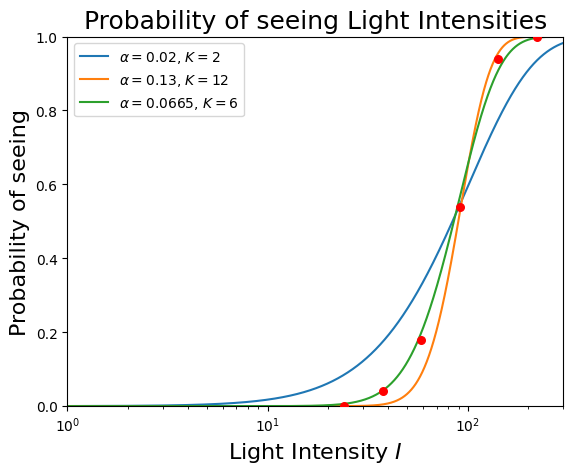

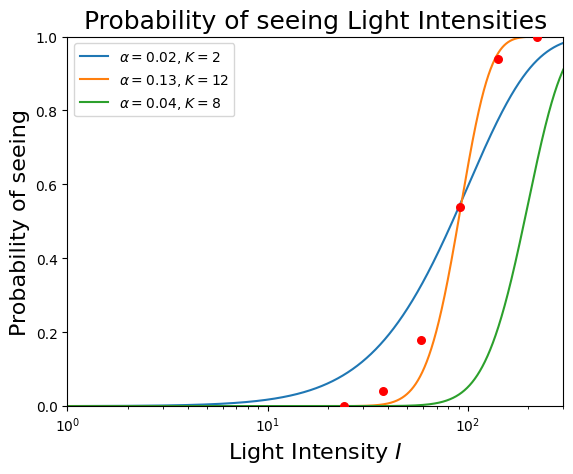

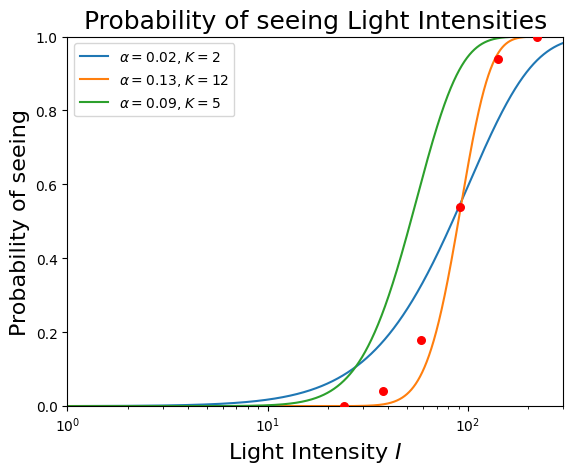

In [5]:
plotfit(a=0.0665, K=6)
plotfit(a=0.04, K=8)
plotfit(a=0.09, K=5)

The value that best fit the data are $\alpha=0.064$ and $K=6$. This example shows that in order to see a dim flash of light the number of photons can be low as long as the absorbance rate, $\alpha$, is high.